In [85]:
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Statistic
from scipy.stats import iqr
import statsmodels.api as sm

### **DATA DICTIONARY**

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month


# Latar Belakang

BUKATOKO merupakan salah satu supermarket yang ada dikota Washington yang menjual berbagai produk seperti daging,wine,buah,ikan,produk manis, dan emas. BukaToko memiliki list data customer yang enrolled dengan supermarket dari 2012-2014. BUKATOKO ingin menganalisa data tersebut, untuk mendapatkan insight sehingga dapat menentukan strategy yang tepat untuk meningkatkan kepuasan pelanggan sehingga, sehingga revenue Supermarket dan user retention tinggi.

Menurut Harvard business Review: Perusahaan yang menganalisa data pelangganya terbukti dapat meningkatkan kepuasan pelanggan hingga 30%.

## Pernyataan Masalah
BUKATOKO ingin meningkatkan revenue dan user retention, untuk itu perusahaan ingin mengetahui **Strategy apa yang tepat berdasarkan data Customer tersebut**.
Informasi tersebut dapat menghemat budget marketing agar lebih tepat sasaran, meningkatkan kepuasan pelanggan, yang mana dapat meningkatkan profit perusahaan

Sebagai seorang *data analyst*, untuk memenuhi requirment dari client, maka saya akan mencoba menjawab pertanyaan berikut:
**Bagaimana behaviour belanja customer di Supermarket berdasarkan data yang ada**

## Data Understanding and Data Cleaning

Sebelum masuk ke dalam analisis, kita perlu melakukan: *data understanding*. Dari proses ini, kita dapat mengetahui anomali-anomali apa saja ada dan perlu ditangani, dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, upload data yang ada

In [86]:
df=pd.read_csv('Supermarket_Customers.csv', sep='\t')
df
#menggunakan sep='\t' agar data bisa dibaca dengan seperated by tab

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [87]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [88]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                    data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [89]:
#5350, 5735 id yang duplicated, salah satu dihapus


SECARA UMUM

- Data superstore memiliki 2240 baris dan 29 kolom
- Kolom Z_CostContact,Z_Revenue berisi data yang kurang informatif untuk analisis sehingga bisa di drop
- Kolom Dt_Customer tipe datanya Object seharusnya datetime,maka perlu diganti
- Cek duplicated data yang ad didata, jika ada perlu di hapus
- Kolom Marital_status & Education terdapat definisi yang sama, contohnya: master & 2n cycle Single dan Alone.
- Baris yang memiliki NaN harus di handle
- Buat kolom baru untuk melihat usia customer di tahun 2014 agar lebih mudah
- Membuat kolom baru untuk RFM analisis

# **Data Cleaning**

In [90]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [91]:
#di drop karena tidak dibutuhkan untuk analisis
df = df.drop(columns='Z_CostContact')
df = df.drop(columns='Z_Revenue')

In [92]:
#FOrmat tanggal ke datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [93]:
df.duplicated().sum()
#cek duplicated data, karena user ID

0

Note: Cek duplicated
- Saat dicek data yang di duplikat 0, karena ID adalah primary key sehingga dianggap unik, maka perlu dihandle dengan cara ID dirubah jadi index baru di cek.
- Untuk datanya akan saya duplicate ke data -> dfx, agar jika ingin memanggil data original(df) untuk perbandingan lebih mudah

In [94]:
dfx=df.copy()
dfx
#mengcopy data untuk diotak atik, jadi data df tetap utuh jika mungkin dibutuhkan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [95]:
dfx=dfx.set_index('ID')
dfx
#merubah ID jadi index, kemudain dicek apakah duplicated atau tidak
#dikahwatirkan ID beda tp data sama, karena saat double input bisa saja ID as primarykey beda tp data sama

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [96]:
dfx.duplicated().sum()
#dicek ternyata ada 182 data duplicated

182

In [97]:
dfx=dfx.drop_duplicates()
dfx
#Menghapus data yang terduplikasi

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,1,3,6,0,0,0,0,0,0,0
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [98]:
dfx=dfx.reset_index()
dfx
#Mengembalikan ID yang tadinya dirubah jadi index ke columns

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,0,0,0,0,0,0
2054,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2055,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2056,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


### 1. Education Coulmn FIX

In [99]:
#dfx['Education'].value_counts()
dfx['Education'].unique()
#saat di cek ternyata ada data 2n cycle di kolom edukasi itu sama seperti master
#

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

referensi 2n cycle = master: https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/

Kolom edukasi memiliki 5 kategory, berdasarkan sumber dari internet, 2n Cycle sama dengan Master, sehingga perlu di handle dengan menganti 2n Cycle menjadi master

In [100]:
dfx['Education']=dfx['Education'].replace('2n Cycle','Master')

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/1435601664.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Education',y='Income',hue='Education',ci=0)


<Axes: xlabel='Education', ylabel='Income'>

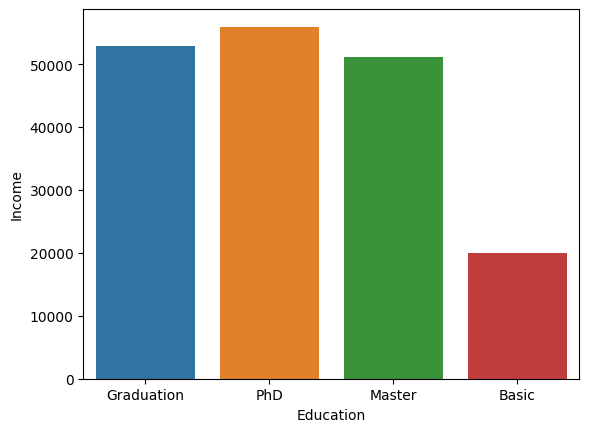

In [101]:
sns.barplot(data=dfx,x='Education',y='Income',hue='Education',ci=0)
#cek apakah 2n cycle sudah ke master
#dari barplot kita bisa lihat income Phd palling tinggi dan basic paling rendah

### 2. Marital Status Coulmn FIX

In [102]:
dfx['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [103]:
dfx['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow       71 
Alone       3  
Absurd      2  
YOLO        2  
Name: count, dtype: int64

Keterangan status Marital
- Single: tidak ada relationship/pasangan
- Together: tinggal bersama tapi status belum menikah
- Married: Menikah secara resmi
- Divorced: Cerai dengan pasangannya
- Widow: Wanita yang pasanganya tutup usia
- Alone: Orang yang memutuskan tinggal sendiri, saya rubah jadi Single, bisa dikategorikan divorce/widow/singl
- Absurd: saya kategorikan single, ga ada anak/remaja
- Yolo: saya kategorikan single juga, You Onlie Life Once

In [104]:
#mengganti status together ke married
# dfx['Marital_Status']=dfx['Marital_Status'].replace('Together','Married')
#mengganti Absurd menjadi single
dfx['Marital_Status']=dfx['Marital_Status'].replace('Absurd','Single')
dfx['Marital_Status']=dfx['Marital_Status'].replace('YOLO','Single')
#punya anak dan memutuskan sendiri
dfx['Marital_Status']=dfx['Marital_Status'].replace('Alone','Single')


In [105]:
dfx['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    521
Single      455
Divorced    216
Widow       71 
Name: count, dtype: int64

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/1698997504.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Marital_Status',y='Income',hue='Marital_Status',ci=0)


<Axes: xlabel='Marital_Status', ylabel='Income'>

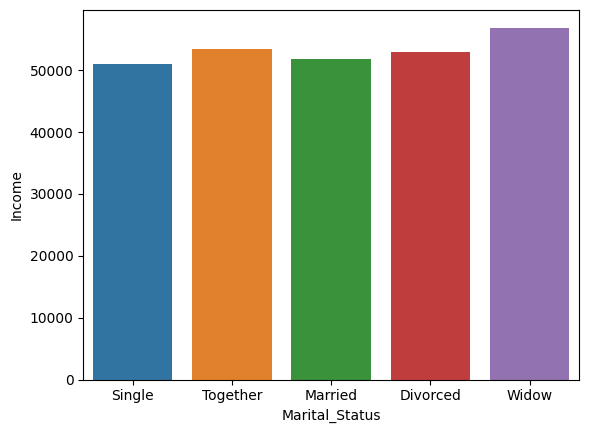

In [106]:
sns.barplot(data=dfx,x='Marital_Status',y='Income',hue='Marital_Status',ci=0)


### 3. Year_Birth FIX

<Axes: ylabel='Year_Birth'>

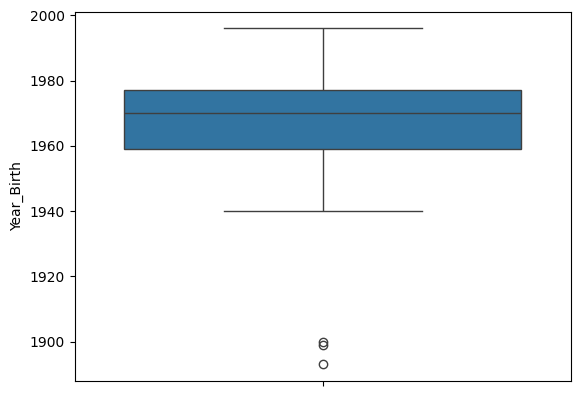

In [107]:
sns.boxplot(data=dfx['Year_Birth'])
#terdapat outlier

In [108]:
q1 = dfx['Year_Birth'].describe()['25%']
q2 = dfx['Year_Birth'].describe()['50%']
q3 = dfx['Year_Birth'].describe()['75%']
iqr=q3-q1
year_birth_outlier_bawah= q1-(1.5*iqr)
year_birth_outlier_atas= q3+(1.5*iqr)
JumlahOutlierYearAtas=dfx[dfx['Year_Birth'] < year_birth_outlier_bawah]['Year_Birth'].count()
JumlahOutlierYearAtas
#ada 3 outlier usia yang mana setelah diperiksa ternaya usianya lbh dari 100 tahun, maka dari itu

3

In [109]:
dfx.sort_values(by='Year_Birth').head(15)
#3 top 3 Year_birth cukup aneh, karena tahun saat mereka enroll dengan perusahaan usia diatas 100 tahun
#Bisa typo, solusi bisa pakai nilai median atau hapus

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
237,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
335,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0
190,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
1805,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,1,4,5,0,0,0,0,0,0,0
417,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,10,5,2,0,0,1,0,0,0,0
1780,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,...,5,13,3,0,0,1,0,0,0,0
1924,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,5,11,1,0,0,1,0,0,0,1
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,10,5,6,1,0,0,0,0,0,1
1106,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,3,13,6,0,0,0,0,0,0,0
354,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,3,5,2,0,0,0,0,0,1,0


<Axes: xlabel='Year_Birth', ylabel='Count'>

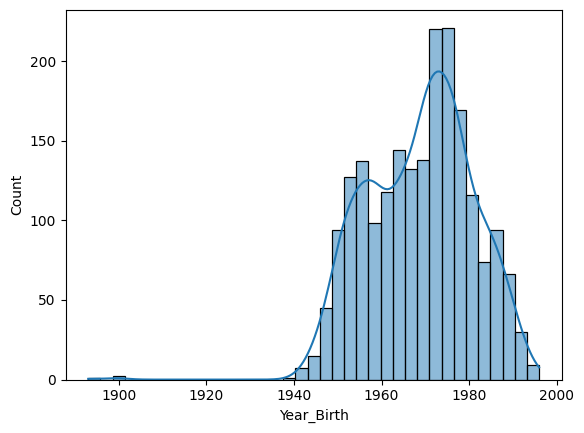

In [110]:
sns.histplot(data=dfx,x='Year_Birth', kde= True)
#data tidak terdistribusi normal

In [111]:
dfx['Year_Birth'].skew()

-0.3761633445265133

In [112]:
dfx['Year_Birth'].kurtosis()
#plety kurtosis
#karena data ga normal pakai median untuk data clean usia

0.8523293427176588

In [113]:
median_year_birth=dfx['Year_Birth'].median()
dfx.loc[dfx['Year_Birth'] <= 1900, 'Year_Birth'] = median_year_birth
dfx.sort_values(by='Year_Birth').head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1805,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,1,4,5,0,0,0,0,0,0,0
417,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,10,5,2,0,0,1,0,0,0,0
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,10,5,6,1,0,0,0,0,0,1
1924,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,5,11,1,0,0,1,0,0,0,1
1780,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,...,5,13,3,0,0,1,0,0,0,0
354,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,3,5,2,0,0,0,0,0,1,0
1106,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,3,13,6,0,0,0,0,0,0,0
409,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,...,5,10,1,0,0,0,0,0,0,0
509,3711,1944,Master,Married,80184.0,0,0,2014-03-01,19,1035,...,3,10,3,0,0,1,1,0,0,0
490,466,1944,Graduation,Married,65275.0,0,0,2013-04-03,9,388,...,3,13,2,0,0,0,0,0,0,0


Year birth terdapat 3 outlier, yang mana jika dihitung usianya > dari 100 tahun, kemungkinan ada keslahan input. dihandle dengan cara menggunakan median

### 4. Income FIX

<Axes: ylabel='Income'>

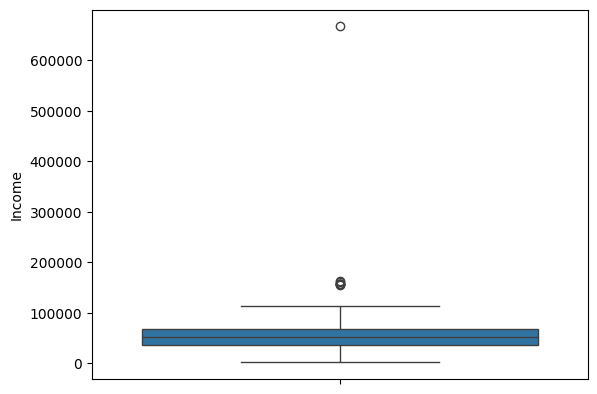

In [114]:
sns.boxplot(data=dfx['Income'])
#ada 1 outlier yang jauh banget

In [115]:
q1 = dfx['Income'].describe()['25%']
q2 = dfx['Income'].describe()['50%']
q3 = dfx['Income'].describe()['75%']
iqr = q3 - q1
bawah= q1-(1.5*iqr)
atas=q3+(1.5*iqr)
print(q1,q2,q3)

35528.25 51533.0 68480.75


In [116]:
Jumlah_outlie_bawah=dfx[dfx['Income'] < bawah]['Income'].count()
Jumlah_outlier_atas=dfx[dfx['Income'] > atas]['Income'].count()
Jumlah_outlier_atas

8

1. Cek outlier dengan boxplot, ternyata secara kasat mata ada yang jauh sekali
2. Saat di cek jumlah outlier yang diatas, ternyata ada 8
3. satu data outlier dihapus karena angkanya terlalu jauh, angka inputnya pun aneh 666666, kenapa dihapus: diasumsikan salah input. dan angkanya dibawah 5%

In [117]:
#menghapus baris dengan id 9432 karena outliernya terlalu extreme
#dari top 8 yg menjadi outlier, top 1 terlalu jauh, dan angkanya 666666 kemungkinan asal input
#maka dari itu memutuskan untuk menghapus kolom id 9432 atau max income
dfx=dfx.drop(dfx[dfx['ID']==9432].index)
dfx.sort_values(by='Income', ascending=False).head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
604,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,1,1,0,0,0,0,0,0,0
669,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,28,1,0,0,0,0,0,0,0,0
1244,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,1,1,0,0,0,0,0,0,0
163,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,22,0,0,0,0,0,0,0,0,0
1548,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,28,0,1,0,0,0,0,0,0,0
1964,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,0
640,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,0,0
1761,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,0,0,1,0,0,0,0,0,0,0
631,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,8,13,3,0,0,1,1,0,0,1
250,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,...,9,13,2,0,1,1,1,1,0,1


<Axes: xlabel='Income', ylabel='Count'>

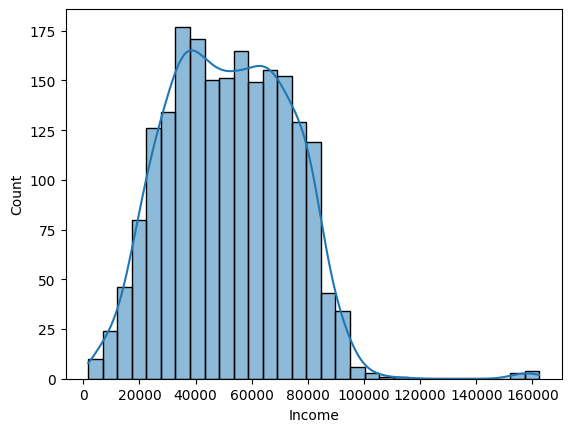

In [118]:
sns.histplot(data=dfx,x='Income', kde= True)

In [119]:
#cek data yang kosong ada berapa
dfx.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Response               0 
dtype: int64

Ada 24 missing value di income.
- Cara handle missing value: bisa dihapus karena < 5%, atau bisa juga mengisi missing value.
Saya memilih mengisi dengan median berdasarkan Education category: Basic, Graduation, Master, PhD.

In [120]:
#Menghitung median berdasarkan category dan membuatnya menjadi series
Education_income_median = dfx.groupby('Education')['Income'].transform('median')
Education_income_median

0       52224.5
1       52224.5
2       52224.5
3       52224.5
4       55012.0
         ...   
2052    52224.5
2054    52224.5
2055    52224.5
2056    49618.0
2057    55012.0
Name: Income, Length: 2057, dtype: float64

In [121]:
dfx["Income"] = dfx['Income'].fillna(value=Education_income_median)

In [122]:
dfx.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [124]:
dfx['Income'].describe()

count    2057.000000  
mean     52054.232134 
std      21464.907293 
min      1730.000000  
25%      35701.000000 
50%      51650.000000 
75%      68148.000000 
max      162397.000000
Name: Income, dtype: float64

Income
- 0-25%: low -> under 35701
- 25-50%: Lower Midle -> 35701 - 51650
- 50-75%: Upper midle -> 51650 - 68148
- 75-100%: high -> > 68148


UMR: 52.054

link: https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

In [125]:
def Income(income):
    if income <= 35701:
        return 'Low'
    elif income <= 51650:
        return 'Lower-Middle'
    elif income <= 68148:
        return 'Upper_Middle'
    else:
        return 'High'
    
dfx['Income_Category'] = dfx['Income'].apply(Income)

## Menambah 4 Kolom baru
- Frequency: Total pembelian melalui semua platform dalam 2 tahun terahir
- Monetary: Total jumlah uang yang dihabiskan untuk membeli produk dalam 2 tahun terahir
- Kolom Usia customer di tahun 2014(2014-year birth)
- Total_offer_diambil: Mengetahi jumlah promo yang diambil oleh customer dari campaig 1-6

In [126]:
dfx['Frequency']=dfx['NumWebPurchases'] + dfx['NumCatalogPurchases'] + dfx['NumStorePurchases']
dfx['Monetary']=dfx['MntWines'] + dfx['MntFruits'] + dfx['MntMeatProducts']+dfx['MntFishProducts']+dfx['MntSweetProducts']+dfx['MntGoldProds']
dfx['Usia_di_2014']=2014-dfx['Year_Birth']
dfx['Total_offer_diambil']=dfx['AcceptedCmp1']+dfx['AcceptedCmp2']+dfx['AcceptedCmp3']+dfx['AcceptedCmp4']+dfx['AcceptedCmp5']+dfx['Response']
dfx

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_Category,Frequency,Monetary,Usia_di_2014,Total_offer_diambil
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,Upper_Middle,22,1617,57,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,Lower-Middle,4,27,60,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,High,20,776,49,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,Low,6,53,30,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,Upper_Middle,14,422,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,0,0,0,0,0,Low,3,22,28,0
2054,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,Upper_Middle,16,1341,47,0
2055,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,Upper_Middle,18,1241,33,1
2056,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,High,21,843,58,0


# RFM

Membuat RFM Score dan kolom segment untuk membantu memahami behaviour customers berdasarkan tingkatan skor

In [127]:
dfrfm=dfx[['ID','Recency','Frequency','Monetary']]
dfrfm

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2052,8080,50,3,22
2054,10870,46,16,1341
2055,7270,91,18,1241
2056,8235,8,21,843


In [128]:
dfrfm.describe()
# cek pembagian categori  R,F,M rank

,ID,Recency,Frequency,Monetary
count,2057.000000,2057.000000,2057.000000,2057.000000
mean,5598.901799,48.964511,12.532815,606.505105
std,3256.590155,29.000590,7.188811,602.865287
min,0.000000,0.000000,0.000000,5.000000
25%,2811.000000,24.000000,6.000000,69.000000
50%,5512.000000,49.000000,12.000000,397.000000
75%,8442.000000,74.000000,18.000000,1047.000000
max,11191.000000,99.000000,32.000000,2525.000000


In [129]:
def R_rank(R_rank):
    if R_rank <= 24:
        return 4
    elif R_rank <= 49:
        return 3
    elif R_rank <= 74:
        return 2
    else:
        return 1
    
dfx['R_rank'] = dfx['Recency'].apply(R_rank)

In [130]:
def F_rank(F_rank):
    if F_rank <= 6:
        return 1
    elif F_rank <= 12:
        return 2
    elif F_rank <= 18:
        return 3
    else:
        return 4
    
dfx['F_rank'] = dfx['Frequency'].apply(F_rank)

In [131]:
def M_rank(M_rank):
    if M_rank <= 69:
        return 1
    elif M_rank <= 397:
        return 2
    elif M_rank <= 1047:
        return 3
    else:
        return 4
    
dfx['M_rank'] = dfx['Monetary'].apply(M_rank)
dfx

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,Income_Category,Frequency,Monetary,Usia_di_2014,Total_offer_diambil,R_rank,F_rank,M_rank
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,Upper_Middle,22,1617,57,1,2,4,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,Lower-Middle,4,27,60,0,3,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,High,20,776,49,0,3,4,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,Low,6,53,30,0,3,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,Upper_Middle,14,422,33,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,0,0,Low,3,22,28,0,2,1,1
2054,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,Upper_Middle,16,1341,47,0,3,3,4
2055,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,Upper_Middle,18,1241,33,1,1,3,4
2056,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,High,21,843,58,0,4,4,3


In [132]:
#Buat RFM Score
dfx['RFM Score']=dfx['R_rank'].astype(str) + dfx['F_rank'].astype(str)+dfx['M_rank'].astype(str)
# dfx['RFM Score']=dfx['RFM Score'].astype(int)
dfx.sort_values(by='RFM Score',ascending=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Income_Category,Frequency,Monetary,Usia_di_2014,Total_offer_diambil,R_rank,F_rank,M_rank,RFM Score
612,3641,1976,Graduation,Married,13624.0,1,0,2013-01-20,93,10,...,0,Low,5,36,38,0,1,1,1,111
919,7574,1979,PhD,Together,27922.0,1,0,2014-05-10,80,11,...,0,Low,5,41,35,0,1,1,1,111
917,6515,1977,Graduation,Together,39771.0,1,0,2013-12-06,92,6,...,0,Lower-Middle,5,50,37,0,1,1,1,111
913,8700,1986,Basic,Single,14906.0,0,0,2012-12-22,86,7,...,0,Low,6,66,28,0,1,1,1,111
204,5176,1988,Graduation,Together,29604.0,1,0,2013-12-08,88,7,...,0,Low,4,53,26,1,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,7849,1970,PhD,Married,80336.0,0,0,2013-09-09,12,209,...,0,High,24,1052,44,0,4,4,4,444
481,3403,1958,PhD,Together,78952.0,0,1,2012-09-24,11,1170,...,0,High,19,2092,56,0,4,4,4,444
411,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,0,High,20,1378,20,4,4,4,4,444
744,1911,1987,Graduation,Together,67430.0,0,0,2012-09-05,6,595,...,0,Upper_Middle,28,1364,27,0,4,4,4,444


### Segment RFM

- VIP = Customer yang terahir beli <23 hari, sering beli, amount spent banyak
- Loyal Customer = Customer yang belanja dalam 2 bulan terahir, tergolong sering belanja dalam 2 tahun terahir dan jumlah spent tergolong tinggi
- High Paying = Customer yang menghasilkan Revenue besar tapi frequency belanja rendah
- Recent customer = customer yang belanja kurang dari 2 bulan terahir namun amount spentnya kecil
- Potential customer = Customer yang Recency, frequency dan amoutn spent belanjanya masih belum dianggap maksimal.
- Once Loyal: customer yang sudah lama tidak belanja namun tercatat frequency belanjanya middle low
- Customer yang sudah lama tidak belanja, frequency rendah dan amount spent juga rendah

In [133]:

# Segment RFM score
def segmentize_rfm(score):
    if score in ['444']:
        return 'VIP'
    elif score in ['443','442','441','434','433','432','431','344','343','342','341','333','332','331','244','243','242','241',]:
        return 'Loyal Customer'
    elif score in ['424','414','334','324','314','234']:
        return 'High Paying'
    elif score in ['413','423','422','412','421','411','313','312','311']:
        return 'Recent Customer'
    elif score in ['323','322','321','233','232','231','224','223','222','221','214','213','212','211','144','143','142','141','134','133','132','131']:
        return 'Potential Customer'
    elif score in ['124','123','122','121']:
        return 'Once Loyal'
    else:
        return 'Lost Customer'

# Apply the function to create a new column 'Segment'
dfx['Segment'] = dfx['RFM Score'].apply(segmentize_rfm)

# Display the result
dfx.sort_values(by='RFM Score',ascending=False).head(20)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Income_Category,Frequency,Monetary,Usia_di_2014,Total_offer_diambil,R_rank,F_rank,M_rank,RFM Score,Segment
1028,3005,1992,Graduation,Single,83528.0,0,0,2014-05-01,7,530,...,High,22,1650,22,3,4,4,4,444,VIP
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,High,20,1438,32,3,4,4,4,444,VIP
160,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,High,25,1706,69,0,4,4,4,444,VIP
162,10095,1975,PhD,Divorced,74165.0,0,0,2013-05-01,9,1001,...,High,19,1293,39,0,4,4,4,444,VIP
1396,25,1958,Graduation,Married,65148.0,0,1,2012-11-16,9,460,...,Upper_Middle,19,1115,56,0,4,4,4,444,VIP
1417,9463,1959,Graduation,Together,71706.0,0,1,2012-11-13,16,931,...,High,21,1443,55,0,4,4,4,444,VIP
67,9369,1979,Master,Single,88194.0,0,1,2014-03-19,19,688,...,High,31,1274,35,3,4,4,4,444,VIP
1429,9264,1986,Graduation,Married,79529.0,0,0,2014-04-27,1,423,...,High,21,1638,28,0,4,4,4,444,VIP
1032,11112,1966,Graduation,Together,70713.0,0,1,2012-12-03,23,736,...,High,19,1477,48,0,4,4,4,444,VIP
1436,8643,1971,Graduation,Together,69930.0,0,0,2013-05-26,21,252,...,High,21,1662,43,0,4,4,4,444,VIP


## DATA SUDAH DI CLEANING

Data sudah di cleaning, sekarang bisa melihat informasi sekilas mengenai data tersebut

In [134]:
listItem = []
for col in dfx.columns :
    listItem.append([col, dfx[col].dtype, dfx[col].isna().sum(),
                    dfx[col].nunique(), list(dfx[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(dfx.shape)
dfDesc

(2057, 37)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2057,"[5798, 4954]"
1,Year_Birth,int64,0,56,"[1983, 1971]"
2,Education,object,0,4,"[Graduation, PhD]"
3,Marital_Status,object,0,5,"[Together, Divorced]"
4,Income,float64,0,1974,"[38557.0, 32727.0]"
5,Kidhome,int64,0,3,"[0, 2]"
6,Teenhome,int64,0,3,"[0, 1]"
7,Dt_Customer,datetime64[ns],0,663,"[2013-06-26T00:00:00.000000000, 2012-08-23T00:00:00.000000000]"
8,Recency,int64,0,100,"[36, 42]"
9,MntWines,int64,0,776,"[992, 355]"


Sebelum dibersihkan dan di handling, data memiliki 2240 baris dan 29 kolom, sekarang memiliki 2057 baris dan 37 kolom, ada 183 baris yang dihapus karena duplikasi dan outlier

In [135]:
dfx.to_csv('Superstore_tableau.csv')
#upload untuk tablue

# Data Analysis

Setelah tahap _data cleaning_ selesai, data bisa mulai di analisis untuk mencari insight mengenai **Bagaimana customer behaviour dan produk yang menghasilkan revenue tertinggi**

Selain itu kita juga bisa melihat seberapa efektif campaign promo yang dilakukan toko terhadap minat customer untuk melakukan transaksi selama 2 tahun terahir melalui RFM analys.


In [216]:
# Top 10 ID berdasarkan best RFM score segment
# dfx.sort_values(by=['Total_offer_diambil'],ascending=False).head(10)
dfx.sort_values(by='RFM Score',ascending=False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Income_Category,Frequency,Monetary,Usia_di_2014,Total_offer_diambil,R_rank,F_rank,M_rank,RFM Score,Segment
1028,3005,1992,Graduation,Single,83528.0,0,0,2014-05-01,7,530,...,High,22,1650,22,3,4,4,4,444,VIP
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,High,20,1438,32,3,4,4,4,444,VIP
160,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,High,25,1706,69,0,4,4,4,444,VIP
162,10095,1975,PhD,Divorced,74165.0,0,0,2013-05-01,9,1001,...,High,19,1293,39,0,4,4,4,444,VIP
1396,25,1958,Graduation,Married,65148.0,0,1,2012-11-16,9,460,...,Upper_Middle,19,1115,56,0,4,4,4,444,VIP
1417,9463,1959,Graduation,Together,71706.0,0,1,2012-11-13,16,931,...,High,21,1443,55,0,4,4,4,444,VIP
67,9369,1979,Master,Single,88194.0,0,1,2014-03-19,19,688,...,High,31,1274,35,3,4,4,4,444,VIP
1429,9264,1986,Graduation,Married,79529.0,0,0,2014-04-27,1,423,...,High,21,1638,28,0,4,4,4,444,VIP
1032,11112,1966,Graduation,Together,70713.0,0,1,2012-12-03,23,736,...,High,19,1477,48,0,4,4,4,444,VIP
1436,8643,1971,Graduation,Together,69930.0,0,0,2013-05-26,21,252,...,High,21,1662,43,0,4,4,4,444,VIP


In [137]:
dfx['Segment'].value_counts()

Segment
Potential Customer    672
Loyal Customer        514
Recent Customer       429
Lost Customer         174
High Paying           106
Once Loyal            93 
VIP                   69 
Name: count, dtype: int64

Berdasarkan TOP 10 RFM, banyak insight yang bisa kita dapat mengenai behaviour customer prioritas(VIP)

- Tidak ada education basic dalam top 10 user, dan mereka memiliki income category Upper_midle dan high.
- Orang dengan status Married/Together lebih banyak jadi VIP customer daripada Single
- Tidak ada basic education yang menjadi customer VIP


## Rekomendasi marketing strategy Berdasarkan RFM Analysis untuk setiap segment customers

- VIP = Customer yang paling banyak menghasilkan revenue karena skor RFM tinggi
Strategy yang cocok dengan membuat Loyalty program dan menawarkan produk baru berdasarkan produk terahir yang mereka beli dan rekomendasikan, terbukti mereka rela menghabiskan uang dalam jumlah yang tinggi, sehingga diskon bukan faktor utama yang menyebabkan mereka spent uang. 'When the reason WHY(Value) is clear, they gonna buy it'. Lakukan Upselling dan cross selling
- Loyal Customer = Loyalty program cocok untuk tipe customer ini, mereka sering belanja dan spentnya masih tergolong tinggi, dengan loyalty bonus, bisa memantaince mereka untuk tetap jadi loyal customer, bisa juga dengan subscription program untuk mendapatkan revenue tambahan dari membership.
- High Paying = Cocok dicross selling atau up selling produk premium. 
- Recent customer = Harus dimaintenante agar user retention tinggi,
- Potential customer = Customer yang Recency, frequency dan amoutn spent belanjanya masih belum dianggap maksimal. bisa diberikan promo tambahan atau discount khusus
- Once Loyal: customer yang sudah lama tidak belanja namun tercatat frequency belanjanya middle low
- Lost Customer:Customer yang sudah lama tidak belanja, frequency rendah dan amount spent juga rendah

Dari RFM analisi, sudah bisa kita lihat bagaimana behaviour belanja customer, untuk customer kategori potential perlu extra perhatian, karena masih cukup enggage dan masih bisa dioptimalkan.

Untuk Once Loyal dan Lost Customer, perlu diberikan promo khusus, untuk melihat apakah mereka masih merespon dan ada minat belanja di superstore tersebut, atau mungkin mereka sudah pindah lokasi.

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/3228346793.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Income_Category',y='Monetary',estimator=np.mean,hue="Income_Category",ci=0)


<Axes: xlabel='Income_Category', ylabel='Monetary'>

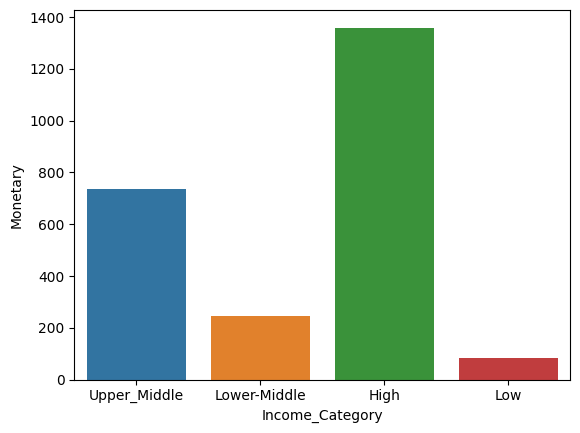

In [138]:
sns.barplot(data=dfx,x='Income_Category',y='Monetary',estimator=np.mean,hue="Income_Category",ci=0)

Grafik untuk memahami behaviour rata-rata monetary berdasarkan income category
Dari grafik diatas, dapat disimpulkan smekain tinggi income category, rata-rata uang yang dibelanjakan juga semakin tinggi.

## Melihat rata-rata recency, frequency dan Monetary dari setiap segment

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/2830345846.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Segment',y='Monetary',estimator=np.mean,hue="Segment",ci=0)


<Axes: xlabel='Segment', ylabel='Monetary'>

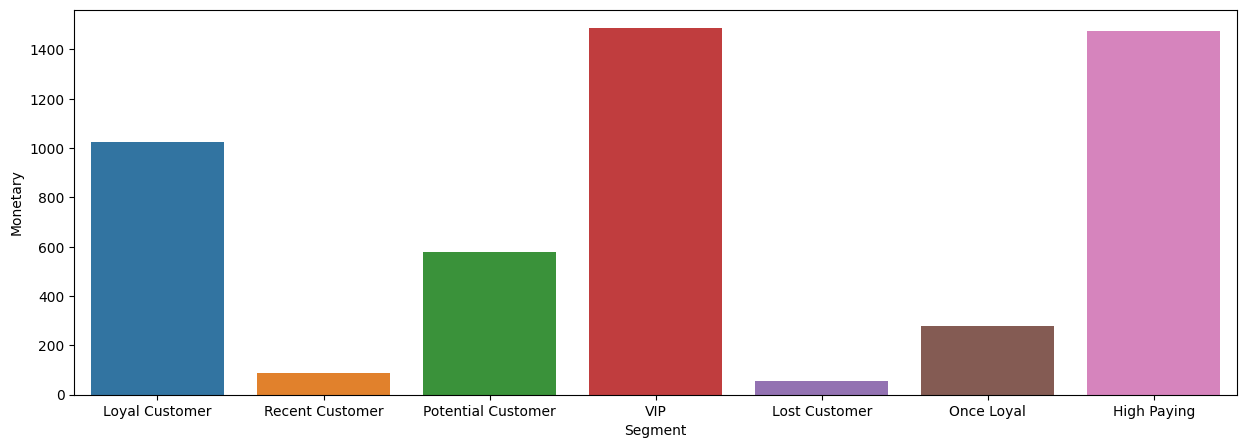

In [222]:
plt.figure(figsize=(15,5))
sns.barplot(data=dfx,x='Segment',y='Monetary',estimator=np.mean,hue="Segment",ci=0)

Ternyata VIP dan High Paying Customer memiliki rata-rata spent amount yang sama, sedangkan untuk recent customer dan lost customer paling rendah.

Hal yang bisa ditingkatkan dari super market adalah menaikan monetary recent customer menyamai Once loyal dan meningkatkan recent customer monetary ke level loyal customer.


/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/2624673606.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Segment',y='Frequency',estimator=np.mean,hue="Segment",ci=0)


<Axes: xlabel='Segment', ylabel='Frequency'>

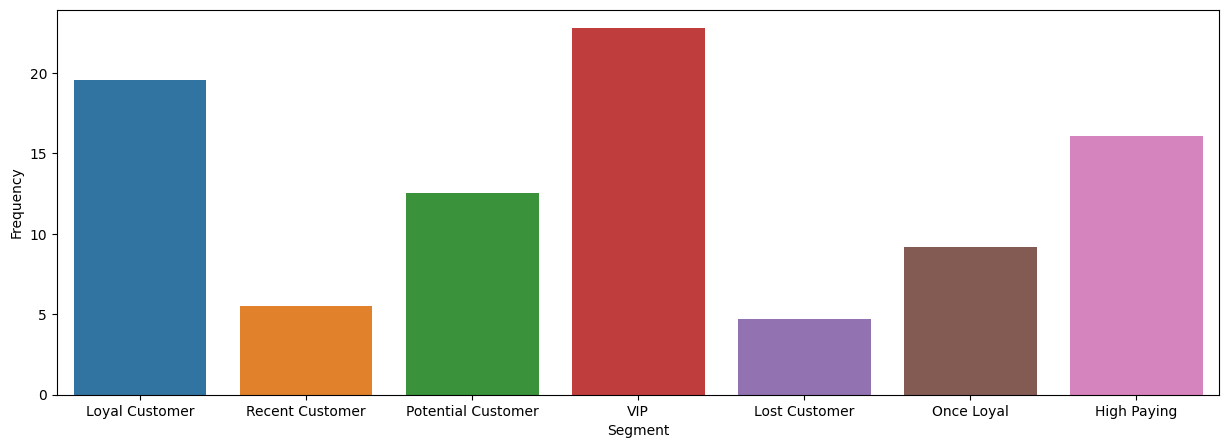

In [140]:
plt.figure(figsize=(15,5))
sns.barplot(data=dfx,x='Segment',y='Frequency',estimator=np.mean,hue="Segment",ci=0)

Meningkatkan frequency belanja untuk bisa dibilang lebih sulit dibandingkan meningkatkan monetary, karena ada beberapa faktor seperti: Free time, Kebutuhan stok masih ada atau tidak dirumah, Paycheck date dll.

Dalam timeframe 2 tahun terahir, customer yang belanja minimal 1x sebulan hanya VIP, sementara sisanya sebulan lebih baru belanja.

Untuk meningkatkan frequency, bisa diberikan Flash sale, sehingga user yang belum waktunya belanja jadi FOMO terhadap promonya, terutama produk paling sering dibeli mereka

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/499078515.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Segment',y='Recency',estimator=np.mean,hue="Segment",ci=0)


<Axes: xlabel='Segment', ylabel='Recency'>

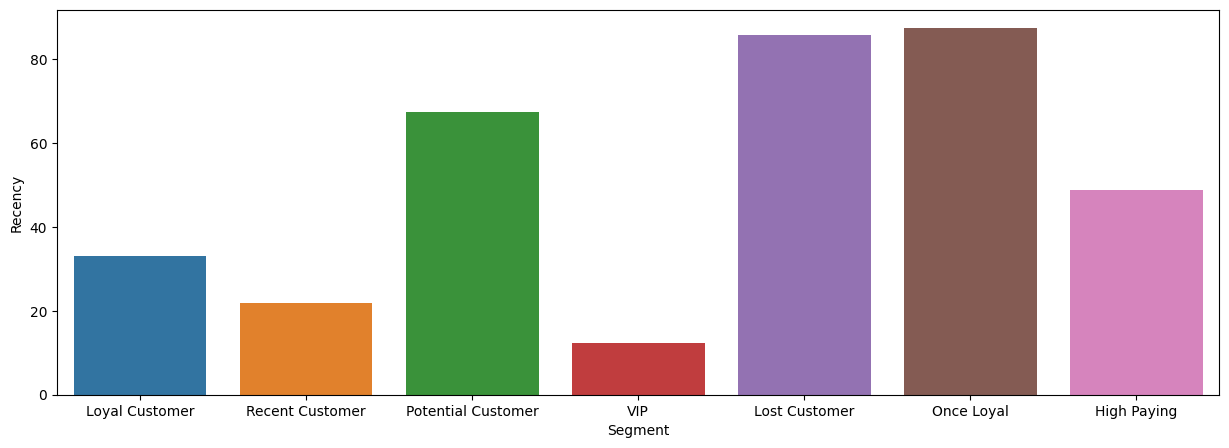

In [141]:
plt.figure(figsize=(15,5))
sns.barplot(data=dfx,x='Segment',y='Recency',estimator=np.mean,hue="Segment",ci=0)

## Uji statistik Inferensia, Descriptif korelasi, Analisa Offer Campaign



1. Dari 4 katogeri Education, apakah semuanya memiliki rata-rata total belanja yang sama dalam 2 tahun terahir. One way anova
2. Apakah proporsi penghasilan Upper_middle dari kesuluruhan Customer adalah 60%.
3. Melihat korelasi Jumlah Deal purchase dengan frequency purchase.
4. Analisa jumlah Offer yang diterima dari campaign 1-6
5. Produk paling banyak menghasilkan revenue


## 1. Education vs Monetary

Untuk melihat apakah tingkat pendidikan aterhadap total amount money?

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/747505657.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfx,x='Education',y='Monetary',estimator=np.mean,hue="Education",ci=0)


<Axes: xlabel='Education', ylabel='Monetary'>

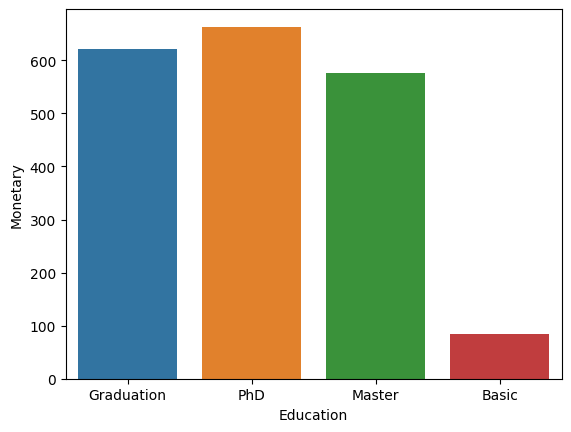

In [142]:
sns.barplot(data=dfx,x='Education',y='Monetary',estimator=np.mean,hue="Education",ci=0)

Dari grafik bisa dilihat, kalau Edukasi memiliki perbedaan terhadap rata-rata Monetary

### One way Anova edu vs Monetrary

Dari 4 Education category, apakah semuanya memiliki rata-rata total belanja yang sama dalam 2 tahun terahir

Meski sudah terlihat digrafik, mari kita buktikan dengan uji one way anova

In [143]:
# One way anova data preparation

Education = dfx['Education']
Amount_spent = dfx['Monetary']

dfx_education = pd.DataFrame({
    'Education': Education,
    'Monetary': Amount_spent
})
dfx_education

,Education,Monetary
0,Graduation,1617
1,Graduation,27
2,Graduation,776
3,Graduation,53
4,PhD,422
...,...,...
2052,Graduation,22
2054,Graduation,1341
2055,Graduation,1241
2056,Master,843


In [144]:
dfx_education.groupby(by='Education')[['Monetary']].mean()

,Monetary
Education,
Basic,83.918367
Graduation,621.969874
Master,576.572779
PhD,663.233333


In [145]:
# import library Anova - one Way
from scipy.stats import f_oneway

In [146]:
stats, pvalue = f_oneway(dfx_education.loc[dfx_education['Education']== 'Basic', 'Monetary'],
         dfx_education.loc[dfx_education['Education']== 'Graduation', 'Monetary'],
         dfx_education.loc[dfx_education['Education']== 'Master', 'Monetary'],
        dfx_education.loc[dfx_education['Education']== 'PhD', 'Monetary'])
pvalue



2.2498193007092253e-09

In [147]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan rata-rata Monetary customer dengan edukasi basic tidak sama dengan 
          rata-rata customer edukasi Graduation, Master dan PhD.
          (Rata-rata amount spent customer dengan Edukasi Basic, Graduation, Master, PhD TIDAK BERBEDA SIGNIFICANT)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita PUNYA cukup bukti untuk mengatakan rata-rata Monetary customer dengan edukasi basic sama dengan 
          rata-rata customer edukasi Graduation, Master dan PhD.
          (Rata-rata amount spent customer dengan Edukasi Basic, Graduation, Master, PhD BERBEDA SIGNIFICANT)''')


pvalue = 2.2498193007092253e-09. pvalue < 0.05. Berhasil menolak Ho.
          Kita PUNYA cukup bukti untuk mengatakan rata-rata Monetary customer dengan edukasi basic sama dengan 
          rata-rata customer edukasi Graduation, Master dan PhD.
          (Rata-rata amount spent customer dengan Edukasi Basic, Graduation, Master, PhD BERBEDA SIGNIFICANT)


## 2. Apakah proporsi penghasilan Upper_middle dari kesuluruhan Customer adalah 60%
One sampel Z test

**Hypotheses:**
- Ho: Proporsi Upper Midle = 0.6
- Ha: Proporsi Fiction ≠ 0.6

Sigficance level (alpha) = 0.05

In [148]:
dfx['Income_Category'].value_counts()['Upper_Middle']

514

In [149]:
# import library untuk z-test
from statsmodels.stats.proportion import proportions_ztest 

In [150]:
# jumlah upper middle
jml_upper_middle = dfx['Income_Category'].value_counts()['Upper_Middle']

# total customer
jml_semua = len(dfx['Income_Category'])

In [151]:
stats, pvalue = proportions_ztest(count = jml_upper_middle,  # jumlah upper middle income
                  nobs = jml_semua,       # jumlah observasi keseluruhan
                  value = 0.6)          # proporsi teoritis

pvalue

1.6375037063972796e-294

In [152]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan proporsi Customer yang mempunyai kategori income upper middle tidak sama dengan 60%.
          (Proporsinya TIDAK BERBEDA SIGNIFICANT)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan proporsi Customer yang mempunya kategori income upper middle tidak sama dengan 60%.
          (Proporsinya BERBEDA SIGNIFICANT)''')
    
    #artinya Upper midle tidak sama dengan 60%

pvalue = 1.6375037063972796e-294. pvalue < 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan proporsi Customer yang mempunya kategori income upper middle tidak sama dengan 60%.
          (Proporsinya BERBEDA SIGNIFICANT)


## 3. Melihat korelasi Jumlah Deal purchase dengan frequency

In [171]:
dfx_offer_deals=dfx[['NumDealsPurchases','Frequency']]
dfx_offer_deals.corr(method='spearman')

,NumDealsPurchases,Frequency
NumDealsPurchases,1.000000,0.109807
Frequency,0.109807,1.000000


Dapat disimpulkan, jumlah deal purchase memiliki korelasi yang sangat lemah terhadap jumlah frequency belanja baik di Store langsung, Web atau Catalog


## 4. Jumlah Offer yang diterima dari campaign 1-6

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/1712181336.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(dfx[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']],estimator=np.sum,ci=0)


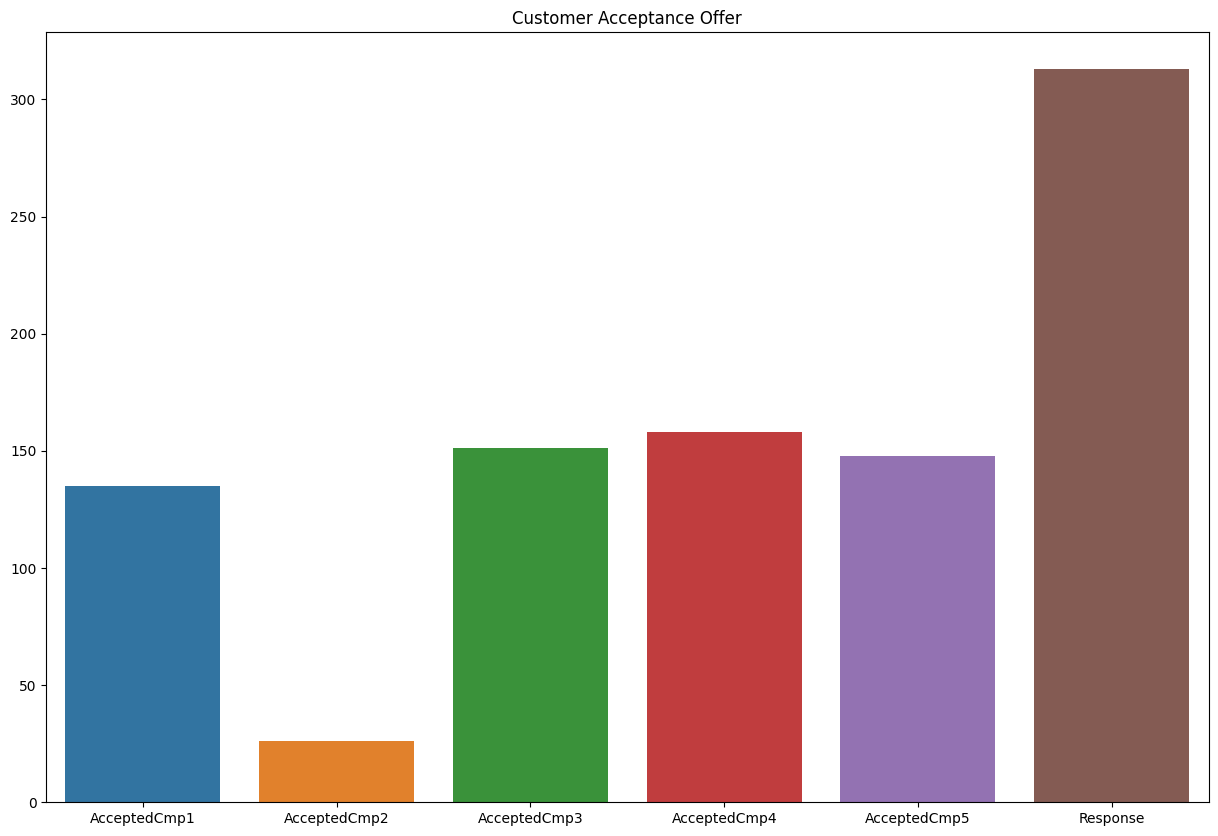

In [167]:
plt.figure(figsize=(15,10))
sns.barplot(dfx[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']],estimator=np.sum,ci=0)

plt.title('Customer Acceptance Offer')
plt.show()

Dari bar grafik diatas dapat disimpulkan bahwa campaign ke 6 bisa dibilang paling sukses karena diterima sekitar 300 lebih customer.
Dan campaign ke 2 sucess rate paling kecil, dibawah 50

Rekomendasi:
Campaign ke 6 bisa dibilang paling sukses, sehingga campaign tersebut bisa di duplikasi dan di improve.

In [ ]:
x=dfx[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response','Monetary']]
x.corr(method='spearman')


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Monetary
AcceptedCmp1,1.000000,0.180891,0.098532,0.247932,0.404834,0.292185,0.327539
AcceptedCmp2,0.180891,1.000000,0.068268,0.277859,0.221106,0.182265,0.121752
AcceptedCmp3,0.098532,0.068268,1.000000,-0.081188,0.080328,0.249225,0.038514
AcceptedCmp4,0.247932,0.277859,-0.081188,1.000000,0.294128,0.167518,0.240016
AcceptedCmp5,0.404834,0.221106,0.080328,0.294128,1.000000,0.322024,0.378856
Response,0.292185,0.182265,0.249225,0.167518,0.322024,1.000000,0.237223
Monetary,0.327539,0.121752,0.038514,0.240016,0.378856,0.237223,1.000000


In [207]:
dfx.corr(numeric_only=True)


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Frequency,Monetary,Usia_di_2014,Total_offer_diambil,R_rank,F_rank,M_rank
ID,1.000000,0.008096,0.002477,0.000129,-0.006265,-0.045310,-0.022203,0.016086,0.000687,-0.010755,...,-0.015819,0.029343,-0.026929,-0.009884,-0.012565,-0.008096,-0.042392,0.043988,-0.008877,-0.012925
Year_Birth,0.008096,1.000000,-0.201485,0.245039,-0.364017,-0.020301,-0.169731,-0.024386,-0.035353,-0.045184,...,-0.000791,0.002217,0.023071,-0.175646,-0.119786,-1.000000,0.017372,0.028467,-0.186663,-0.156151
Income,0.002477,-0.201485,1.000000,-0.517308,0.035451,0.002121,0.676795,0.500719,0.677983,0.513870,...,0.102271,-0.030012,0.159259,0.730496,0.781869,0.201485,0.338880,-0.001021,0.727502,0.779227
Kidhome,0.000129,0.245039,-0.517308,1.000000,-0.045834,0.017113,-0.503041,-0.372045,-0.436777,-0.386888,...,-0.085655,0.037740,-0.084072,-0.573823,-0.561116,-0.245039,-0.202589,-0.022499,-0.577106,-0.590805
Teenhome,-0.006265,-0.364017,0.035451,-0.045834,1.000000,0.022009,0.006166,-0.178675,-0.260572,-0.197335,...,-0.025857,-0.001719,-0.157222,0.033130,-0.137896,0.364017,-0.160073,-0.030648,0.042416,-0.040193
Recency,-0.045310,-0.020301,0.002121,0.017113,0.022009,1.000000,0.011204,-0.010844,0.013932,-0.000951,...,-0.009317,0.007298,-0.203110,0.001143,0.012992,0.020301,-0.093491,-0.967414,-0.001680,0.006940
MntWines,-0.022203,-0.169731,0.676795,-0.503041,0.006166,0.011204,1.000000,0.388125,0.554762,0.395633,...,0.199491,-0.037788,0.238800,0.752493,0.889487,0.169731,0.482008,-0.010509,0.741975,0.817773
MntFruits,0.016086,-0.024386,0.500719,-0.372045,-0.178675,-0.010844,0.388125,1.000000,0.541025,0.593131,...,-0.005064,-0.002220,0.129959,0.517379,0.614157,0.024386,0.180329,0.007114,0.517122,0.567583
MntMeatProducts,0.000687,-0.035353,0.677983,-0.436777,-0.260572,0.013932,0.554762,0.541025,1.000000,0.562545,...,0.045728,-0.021867,0.236569,0.617676,0.840506,0.035353,0.328579,-0.010001,0.606333,0.719832
MntFishProducts,-0.010755,-0.045184,0.513870,-0.386888,-0.197335,-0.000951,0.395633,0.593131,0.562545,1.000000,...,0.003349,-0.018663,0.105782,0.537223,0.640179,0.045184,0.172618,-0.004971,0.527924,0.592807


In [217]:
dfx['Response'].value_counts()

Response
0    1744
1    313 
Name: count, dtype: int64

Korelasi antara Offer campaign dan Monetary tergolong lemah, Monetary memiliki korelasi yang tinggi dengan Income dan Frequency.

Untuk jumlah anak dirumah memiliki korelasi berlawanan yang berlawanan dengan Monetary, artinnya semakin tinggi banyak jumlah anak dirumah, amount spent semakin sedikit dan begitu pula sebaliknya. Sehingga marketing angle anak perlu dikurangi, agar budget marketing tidak tebuang sia". Apalagi produk paling banyak terjual adalah wine dan daging, bukan produk manis" (kesukaan anak)

## 5. Produk Yang paling banyak menghasilkan revenue

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_22909/763225120.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plots=sns.barplot(


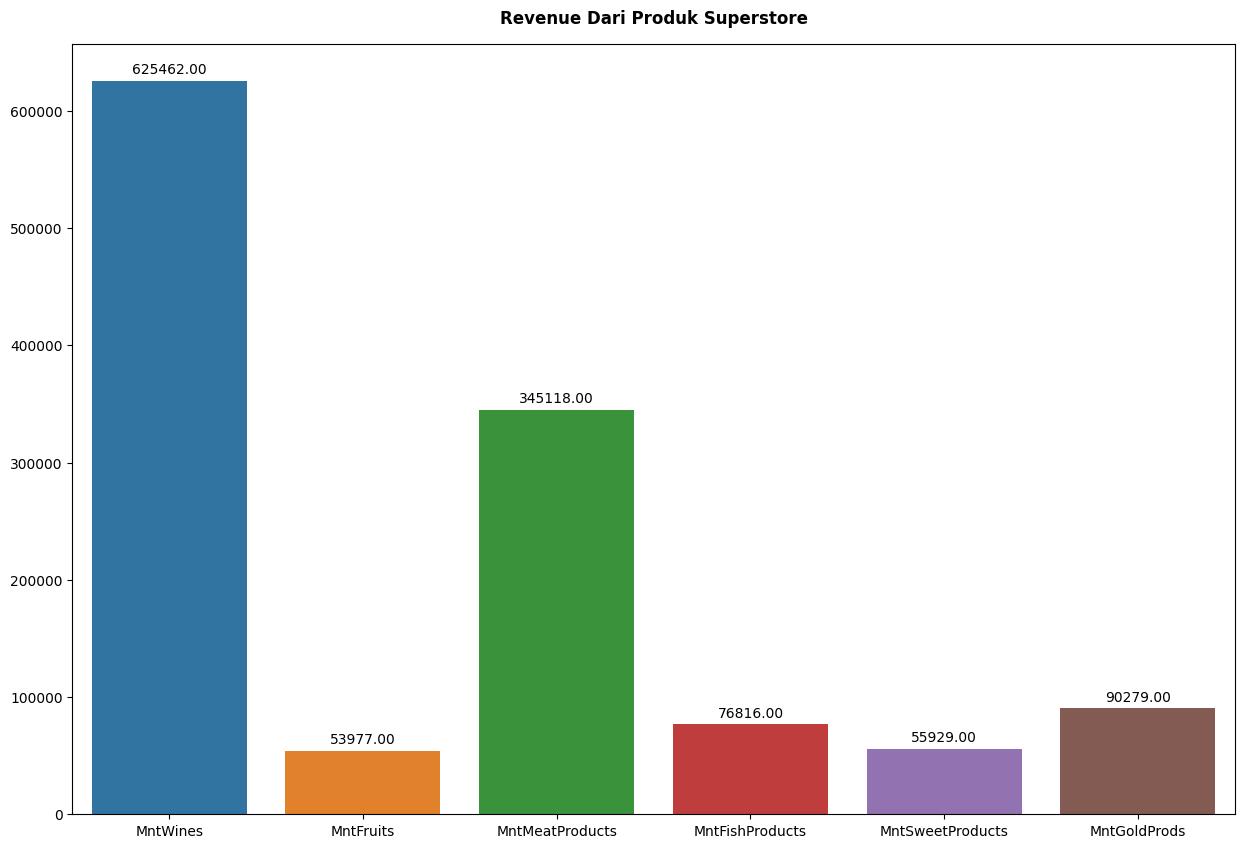

In [ ]:
dfx_list_product = dfx[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
plt.figure(figsize=(15,10))
plots=sns.barplot(
    data=dfx_list_product,
    estimator=sum,
    ci=0
    )

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),             # 2 angka di belakang koma
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Revenue Dari Produk Superstore', loc='center', pad=15, fontweight = "bold")
plt.show()

Berdasarkan Bar Chart diatas dapat disimpulkan bahwa :
- Wine menghasilkan revenue tertinggi dalam waktu 2 tahun terahir sebesar: 625462 usd, sedangkan paling sedikit menghasilkan revenue adalah buah sebesar 53977 usd

Rekomendasi:
Untuk meningkatkan revenue bisa dilakukan beberapa strategy
 1. Menambah produk untuk dilakukan cross selling dengan produk yang mirip seperti wine.
 2. Jika ingin meningkatkan penjualan produk seperti buah atau sweet produk, bisa dibuat penawaran promo bundling, beli wine+buah diskon x %

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_22909/3281363079.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plots=sns.barplot(


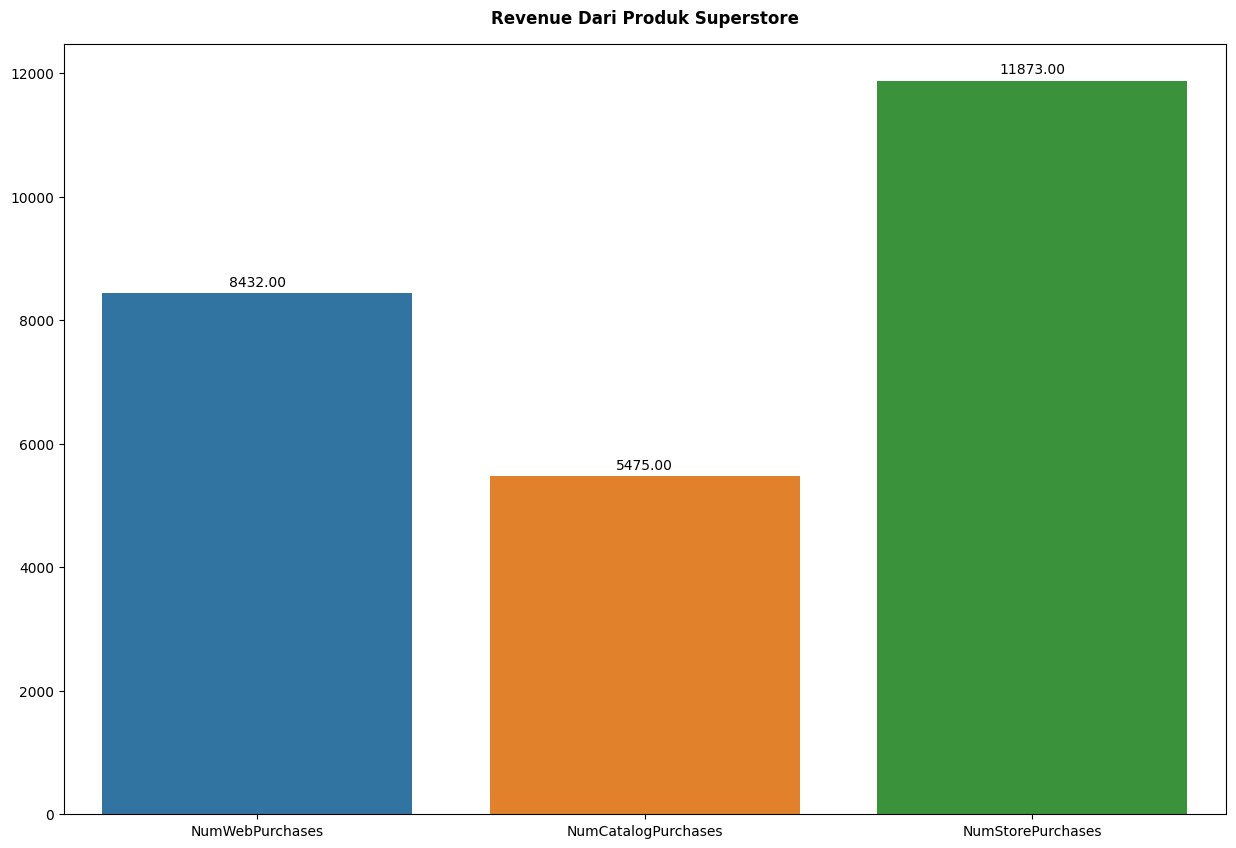

In [ ]:
dfx_list_platform = dfx[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
plt.figure(figsize=(15,10))
plots=sns.barplot(
    data=dfx_list_platform,
    estimator=sum,
    ci=0
    )

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),             # 2 angka di belakang koma
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Revenue Dari Produk Superstore', loc='center', pad=15, fontweight = "bold")
plt.show()

Berdasarkan Barchart diatas bisa dilihat,total customer yang belanja dalam 2 tahun terahir paling banyak melakukan transaksi di Store dan paling sedikit di Catalog.
Untuk cataloge purchase bisanya punya convertion rate tinggi, namun punya kelemahan foto produk tidak flexible update. 

Rekomendasi
1. Untuk meningkatkan penjualan di web, bisa mengoptimasi website dan memperbaiki UI/UX
2. Untuk Meningkatkan penjualan dicatalog bisa dengan memberikan membership promo atau subcription, karena catalog untuk update isinya akan membutuhkan biaya marketing tambahan.

## Analisa 10 customer Segment VIP dengan Monetary top 10

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/3893512974.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plots=sns.barplot(


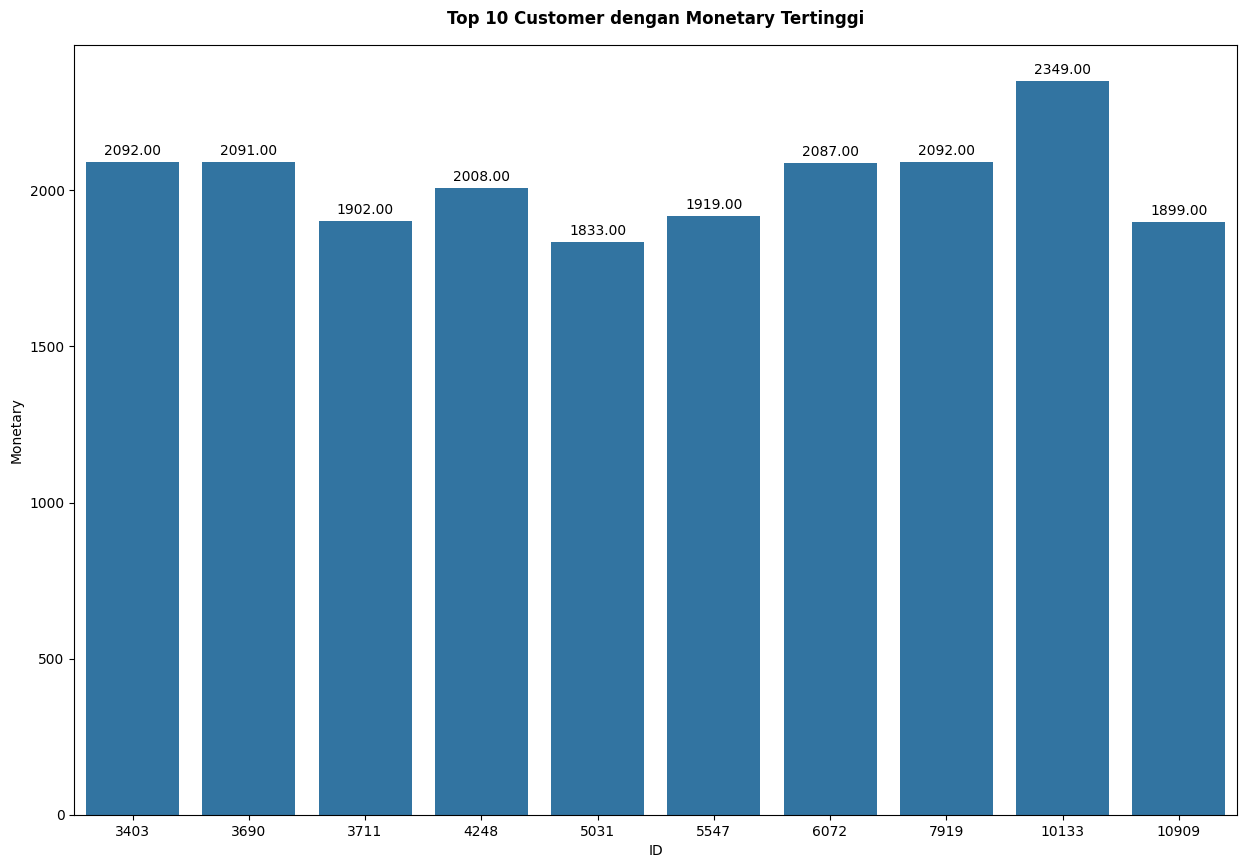

In [194]:
dfx_list_platform = dfx[['Monetary','Segment']]
dfx_segment_vip= dfx[dfx['Segment']== 'VIP']
plt.figure(figsize=(15,10))
plots=sns.barplot(
    data=dfx_segment_vip.sort_values(by='Monetary',ascending=False).head(10),
    x='ID',
    y='Monetary',
    estimator=sum,
    ci=0
    )

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),             # 2 angka di belakang koma
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Top 10 Customer dengan Monetary Tertinggi', loc='center', pad=15, fontweight = "bold")
plt.show()

Dari hasil grafik di atas, kita bisa melihat 10 customer ID segment VIP yang menghasilkan omset terbesar untuk supermarket

ID 10133 termasuk segment VIP dengan revenue  2349 usd dalam 2 tahun terahir

In [201]:
from scipy.stats import shapiro

In [206]:
stats, pvalue = shapiro(dfx['Monetary'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi NORMAL')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data TIDAK terdistribusi normal')

pvalue=7.152626731976199e-39, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data TIDAK terdistribusi normal


## Segment RFM dengan total Monetary terbanyak

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_67233/4108919418.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plots=sns.barplot(


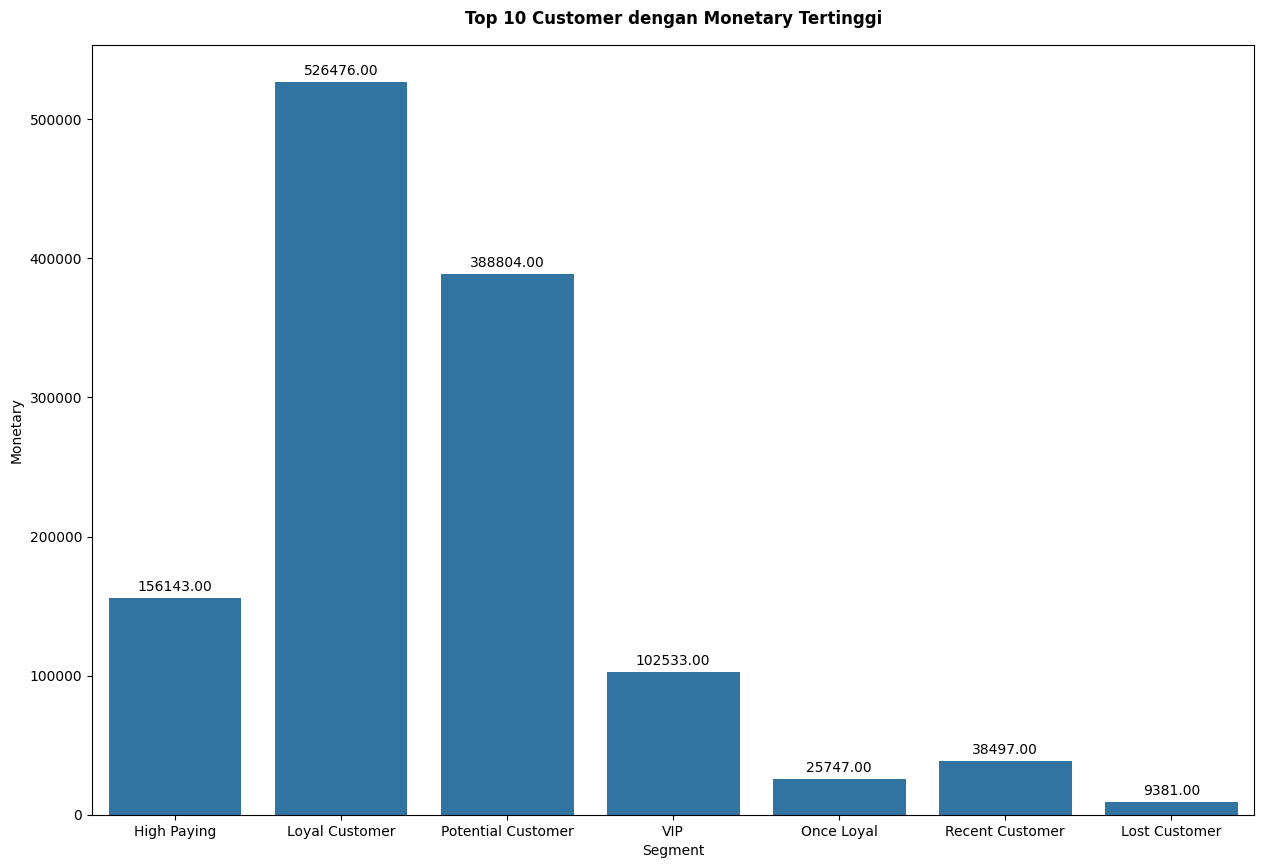

In [210]:
dfx_list_platform = dfx[['Monetary','Segment']]
dfx_segment_vip= dfx[dfx['Segment']== 'VIP']
plt.figure(figsize=(15,10))
plots=sns.barplot(
    data=dfx.sort_values(by='Monetary',ascending=False),
    x='Segment',
    y='Monetary',
    estimator=sum,
    ci=0
    )

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),             # 2 angka di belakang koma
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Customer Segment dan Monetary', loc='center', pad=15, fontweight = "bold")
plt.show()

In [220]:
dfx['Segment'].value_counts()

Segment
Potential Customer    672
Loyal Customer        514
Recent Customer       429
Lost Customer         174
High Paying           106
Once Loyal            93 
VIP                   69 
Name: count, dtype: int64

## Kesimpulan dan Rekomendasi

Kesimpulan:
1. Dari Data Analisa diatas, dengan menggunakan Metode RFM Analisis, kita bisa melihat behaviour customer berdasarkan segment, sehingga lebih akurat dan customize untuk memberikan promo.
    Dari 2057 Customer, customer kategori VIP memiliki jumlah paling sedikit sebanyak 69, sedangkan paling banyak adalah Potential customer(672) dan diikuti oleh Loyal Customer.

2. Customer VIP merupakan category customer Impian dari supermarket, karena RFM score yang terbaik, untuk rata-rata Monetrary, VIP cutomer memang tertinggi dibanding segment lain, namun Total jumlah revenue paling banyak dihasilkan dari Loyal customer dengan total sebesar $526476.

4. Dari category Education, rata-rata Monetary basic education tercatat yang paling rendah, sedangkan Graduation, Master dan PhD tidak ada perbedaan yang significant.

5. Wine dan daging menjadi produk penghasil revenue tertinggi

6. Store purchase masih menjadi tempat paling sering digunakan untuk melakukan transaksi(11873), dan cataloge yang paling rendah (5475)


Rekomendasi
1. Berdasarkan RFM Analisis, telah dibuat customer berdasarkan segment

- VIP = Customer impian supermarket karena memiliki skor RFM tinggi,
Strategy yang cocok dengan tipe customer ini adalah membuat Loyalty program dan menawarkan produk baru berdasarkan produk terahir yang mereka sering beli, terbukti mereka rela menghabiskan uang dalam jumlah yang tinggi, sehingga diskon bukan faktor utama yang menyebabkan mereka spent uang. 'When the reason WHY(Value) is clear, they gonna buy it'. Lakukan Upselling dan cross selling

- Loyal Customer = Loyalty program cocok untuk tipe customer ini, mereka sering belanja dan spentnya masih tergolong tinggi, dengan loyalty bonus, bisa memantaince mereka untuk tetap jadi loyal customer, bisa juga dengan subscription program untuk mendapatkan revenue stream tambahan dari membership.

- High Paying = Cocok dicross selling atau up selling produk premium. 

- Recent customer = Harus dimaintenante agar user retention tinggi, bisa dengan meningkatkan user expereince keteika belanja, misal transaksi cepat & ramah. Untuk website loading dan interface UI UX bagus.

- Potential customer = Customer yang Recency, frequency dan amoutn spent belanjanya masih belum dianggap maksimal. bisa diberikan promo tambahan atau discount khusus. **Misal belanja minimal 800 dolar(200 dolar lebih tinggi dari rata-rata monetary segment potential customer), maka customer berkesempatan ikut undian mobil, atau voucer belanja hingga $5000**.

- Once Loyal: customer yang sudah lama tidak belanja namun tercatat frequency belanjanya middle low, bisa di lakukan enggagement marketing, berharap awarnes akan superstore meningkat dan membuat mereka kembali belanja di supermarket.

- Lost Customer:Customer yang sudah lama tidak belanja, frequency rendah dan amount spent juga rendah.
Ini jadi prioritas terahir, jika ada budget marketing berlebih baru coba diberikan offer ke mereka, jika tidak 'Let it go'

    Dengan mengkelompokan customer berdasarkan segment behaviour purchasing, offer yang ditawarkan bisa lebih spesifik tergantung behaviour tersebut, sehingga budget iklan jadi lebih efektif.
    Segment mana yang kiranya dapat menghasilkan revenue terbaik dan dioptimalkan untuk generate revenue tambahan.

2. Segemnt VIP dan Loyal customer tentunya menjadi prioritas untuk di maintance agar user retention tinggi, namun segment Potential customer menghasilkan total revenue terbesar ke 2, jika bisa ditingkatkan 30% maka revenue supermarket akan melonjak tinggi. Sehingga budget marketing campaign selanjutnya difokuskan ke category customer Potention.

3. Untuk meningkatkan purchase melalui website, Supermarket bisa menjalankan campaign SEO atau media Social media untuk meningkatkan enggament, yang kemudian diarahkan pembelian melalui website.

    Website diberi tracking pixel, sehingga bisa memungkinkan melakukan retargeting/remarketing campaign berdasarkan user behaviour yang berkunjung ke website supermarket.

    Untuk produk penghasil revenue terbanyak bisa diletakan di bagian paling atas website.
    Customer yang puas dengan pembelian produk di supermarket bisa juga diminta untuk mengisi review yang bisa dijadikan social prof, dan bagi customer yang melakukan review akan mendapatkan cashback atau point yang bisa digunakan jika mereka melakukanya next purchase.

    Untuk Marital_status bisa dijadikan sebagai konten buyer persona,  headline campaign  buyer persona berdasarkan marital status:Maried/Together: Nikmati wine dari perancis dengan pasangan anda.


4. Dari offer campaign 1 sampai 6, campaign offer paling efektif adalah yang ke 6, dengan 313 orang menerima offer(15%) dari total customer. Style offer campaign ke 6, bisa di gunakan kembali dan di improve dengan melakukan A/B testing offer. Misal dengan menjadikan campaign ke 6 sebagai benchmark. kemudian di testing ke audience potential 100 orang dengan offer A dan 100 orang audeince potensial dengan offer B, untuk melihat respon dan reaksi mereka terhadap offer tersebut. Offer yang paling banyak diterima, akan diimprove dan dilakukan A/B testing terus.
A/B testing paling ideal bisa dilakukan melalui website purchase, karena mengganti interface website lebih hemat budget dibanding harus A/B testing cataloge(harus print banyak), atau A/B testing dekorasi Store offline yang memakan banyak waktu.

5. Produk yang menghasilkan revenue terbanyak adalah wine dan daging, bisa menggunakan strategy cross selling produk yang serupa, misal menjual produk daging olahan, atau daging varian terbaru yang membuat customer penasaran ingin mencoba produk tersebut. Bisa juga dengan bundling produk terlaris dengan produk paling jarang peminat.



Link Tableau

https://public.tableau.com/app/profile/suryo.apendi/viz/Capstone_Modul_2_Supermarket_sales/StoryCapstone